# Fondements du multimédia

## TP5 : Gamma

## Thomas PASCUZZI
## Master PSM 1ere année

## I Gamma et gris moyen

La correction gamma est nécessaire car à l'affichage sur un moniteur, la courbe de gamma est tirée vers le bas ce qui fait que  l'image sera plus sombre.

Lors de la capture, l'image est enregistrée avec un gamma supérieur afin de combler le manque produit par le moniteur lors de l'affichage.

En photographie, le gamma est une valeur exprimée entre 2 et 3. On prend donc par défaut la valeur 2.5. Ensuite on passe en facteur la valeur de gamma pour la luminosité de chaque pixel. Si on prend la luminosité moyenne, à savoir 0.5 et qu'on lui passe le facteur 2.5, on obtient 0.18. Le gris moyen en photographie est donc de 0.18.

L = f(v) = v^2<>3

## II Courbes Gamma

### Importation des bibliothèques

In [1]:
# Installation du module colour-science
!pip install colour-science

In [26]:
# Bibliothèques Skimage
import skimage
from skimage import data, io
from skimage.color import rgb2gray

# Bibliothèque Numpy
import numpy as np

# Bibliothèque Matplotlib
import matplotlib.pyplot as plt

In [18]:
# On créé un vecteur afin d'afficher les courbes de gamma
nivGris = np.linspace(0,1,100)

In [19]:
# On charge une nouvelle image
imageLocale = io.imread("casoar.jpg")

# On transforme l'image en niveaux de gris avec une méthode de Skimage
imageNivGris = rgb2gray(imageLocale)

In [20]:
# On initialise les valeurs des gammas moniteur et caméra
gammaMoniteur = 2.5
gammaCamera = 1 / gammaMoniteur

In [21]:
# On définit la fonction qui permet d'appliquer le gamma
def appliquerGamma(img, gamma):
    img = img ** gamma # On passe le gamme en facteur de la luminosité de chaque pixel
    return img

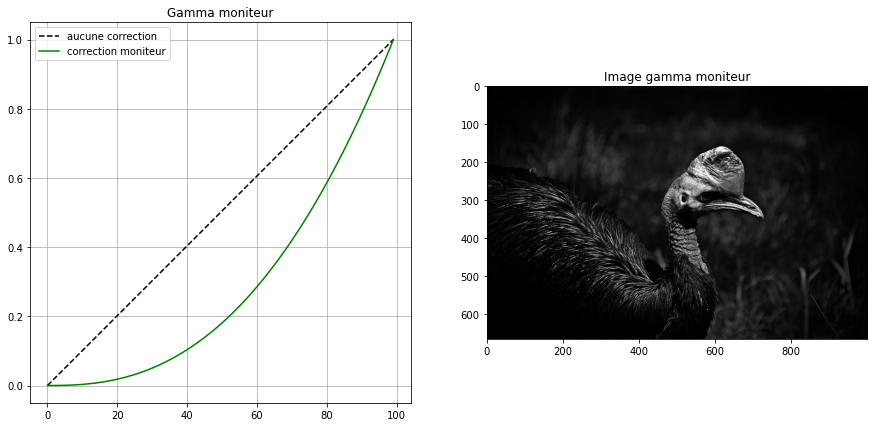

In [22]:
# On applique le gamma moniteur sur un vecteur afin de tracer une courbe
nivGrisGammaMoniteur = appliquerGamma(nivGris,gammaMoniteur)

# On affiche la courbe du gamma moniteur
f, tab = plt.subplots(1,2,figsize=(15,7))
tab[0].plot(nivGris,"--k", label = "aucune correction")
tab[0].plot(nivGrisGammaMoniteur,"-g", label = "correction moniteur")
tab[0].title.set_text('Gamma moniteur')
tab[0].legend(loc="upper left")
tab[0].grid(visible = True)

# On affiche l'image telle qu'elle devrait s'afficher sur un moniteur sans correction
tab[1].imshow(appliquerGamma(imageNivGris, gammaMoniteur),cmap='gray')
tab[1].title.set_text('Image gamma moniteur')

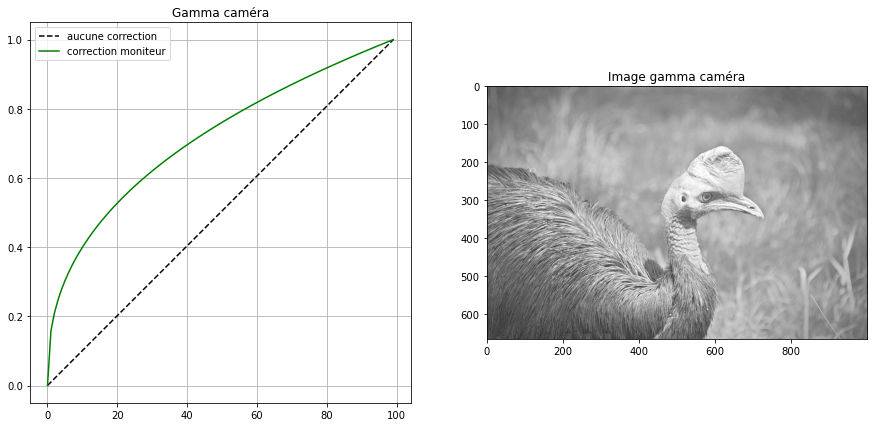

In [23]:
# On applique le gamma caméra sur un vecteur afin de tracer une courbe
nivGrisGammaCamera = appliquerGamma(nivGris,gammaCamera)

# On affiche la courbe du gamma caméra
f, tab = plt.subplots(1,2,figsize=(15,7))
tab[0].plot(nivGris,"--k", label = "aucune correction")
tab[0].plot(nivGrisGammaCamera,"-g", label = "correction moniteur")
tab[0].title.set_text('Gamma caméra')
tab[0].legend(loc="upper left")
tab[0].grid(visible = True)

# On affiche l'image telle qu'elle est capturée par la caméra
tab[1].imshow(appliquerGamma(imageNivGris, gammaCamera),cmap='gray')
tab[1].title.set_text('Image gamma caméra')

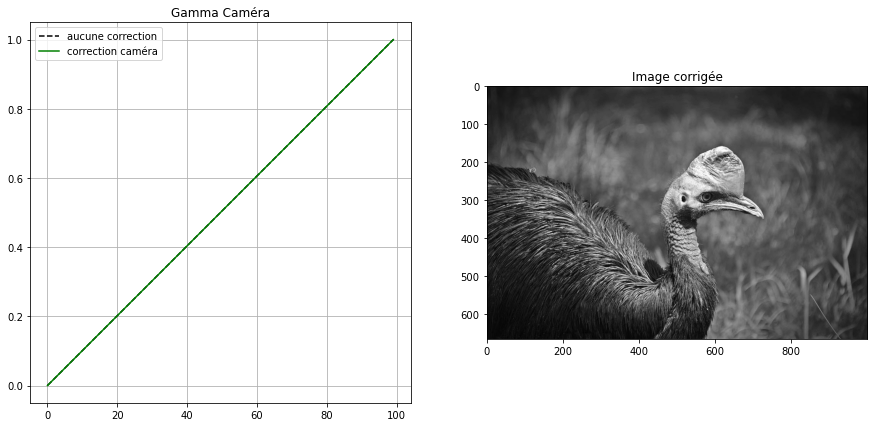

In [24]:
# On applique le gamma moniteur sur la courbe pour le gamma corrigé
nivGrisGammaSys = appliquerGamma(nivGrisGammaCamera,gammaMoniteur)

imgCamera = appliquerGamma(imageNivGris, gammaCamera)

imgGammaSys = appliquerGamma(imgCamera,gammaMoniteur)

# On affiche la courbe du gamma corrigé
f, tab = plt.subplots(1,2,figsize=(15,7))
tab[0].plot(nivGris,"--k", label = "aucune correction")
tab[0].plot(nivGrisGammaSys,"-g", label = "correction caméra")
tab[0].title.set_text("Gamma Caméra")
tab[0].legend(loc="upper left")
tab[0].grid(visible = True)

# On affiche l'image corrigée
tab[1].imshow(imgGammaSys,cmap='gray')
tab[1].title.set_text('Image corrigée')

On constate que la courbe de gamma corrigée correspond à la courbe de la luminosité. Celà signifie que l'image affichée est correcte